## Packages Import

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Model Learning
from sklearn import model_selection
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report

# Standard Libraries
import math, time, datetime
from collections import Counter

# Managaing Warnings
import warnings
warnings.filterwarnings('ignore')

## Get the dataset

In [2]:
train = pd.read_csv('./datasets/train.csv')

In [3]:
test = pd.read_csv('./datasets/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Data Exploration

In [6]:
# Describing Numerical Features
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Describing Categorical Features
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hawksford, Mr. Walter James",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# test dataframe won't include Survived
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
# Full dataset
df = pd.concat([train, test], axis=0).reset_index(drop=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## Outlier Detection

In [20]:
def plot_boxplot(df, features, cols=2, width=20, height=15, hspace=0.4, wspace=0.5):
    fig = plt.figure(figsize=(width,height), dpi=100)
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df.shape[1]) / cols)
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(feature)
        g = sns.boxplot(df[feature])
        plt.xticks(rotation=25)

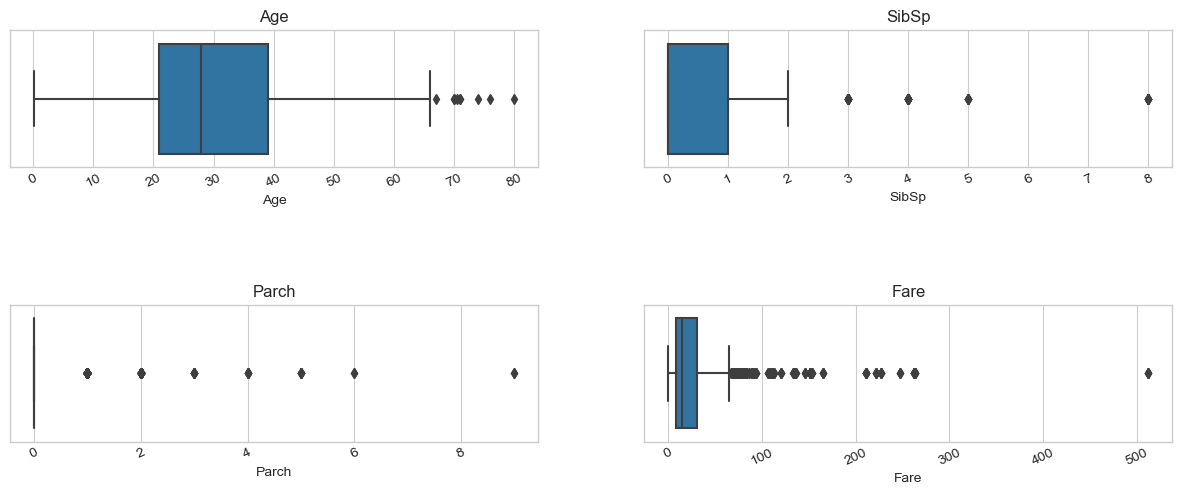

In [21]:
# Visualize numerical features to detect outliers
plot_boxplot(df, ['Age', 'SibSp', 'Parch', 'Fare'], width=15, height=20, hspace=1, wspace=0.2)

In [11]:
def detect_outliers(df,features,n):
    outlier_indices = []
    
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than n outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outlier_indices = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outlier_indices 

In [12]:
# detect outliers from Age, SibSp , Parch and Fare. 
# Considered outliers as rows that have at least two outlied numerical values.
Outlier_indices_to_drop = detect_outliers(train,["Age","SibSp","Parch","Fare"], 2)

In [13]:
train.loc[Outlier_indices_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [14]:
# Drop outliers
train = train.drop(Outlier_indices_to_drop, axis = 0).reset_index(drop=True)

In [15]:
# Full dataset
df = pd.concat([train, test], axis=0).reset_index(drop=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1299 non-null   int64  
 1   Survived     881 non-null    float64
 2   Pclass       1299 non-null   int64  
 3   Name         1299 non-null   object 
 4   Sex          1299 non-null   object 
 5   Age          1043 non-null   float64
 6   SibSp        1299 non-null   int64  
 7   Parch        1299 non-null   int64  
 8   Ticket       1299 non-null   object 
 9   Fare         1298 non-null   float64
 10  Cabin        292 non-null    object 
 11  Embarked     1297 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 121.9+ KB


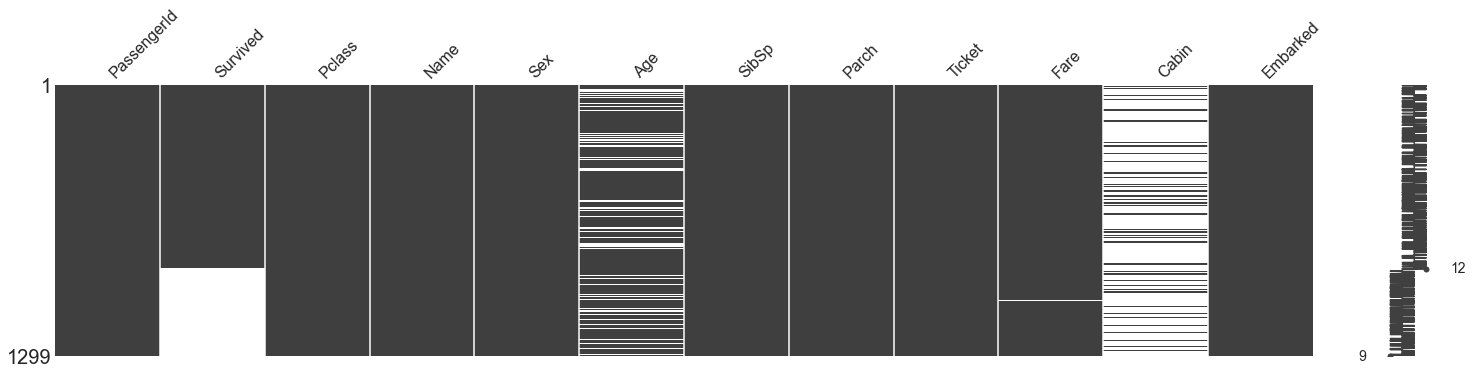

In [17]:
# Visualise the missing values
missingno.matrix(df, figsize=(25, 5));

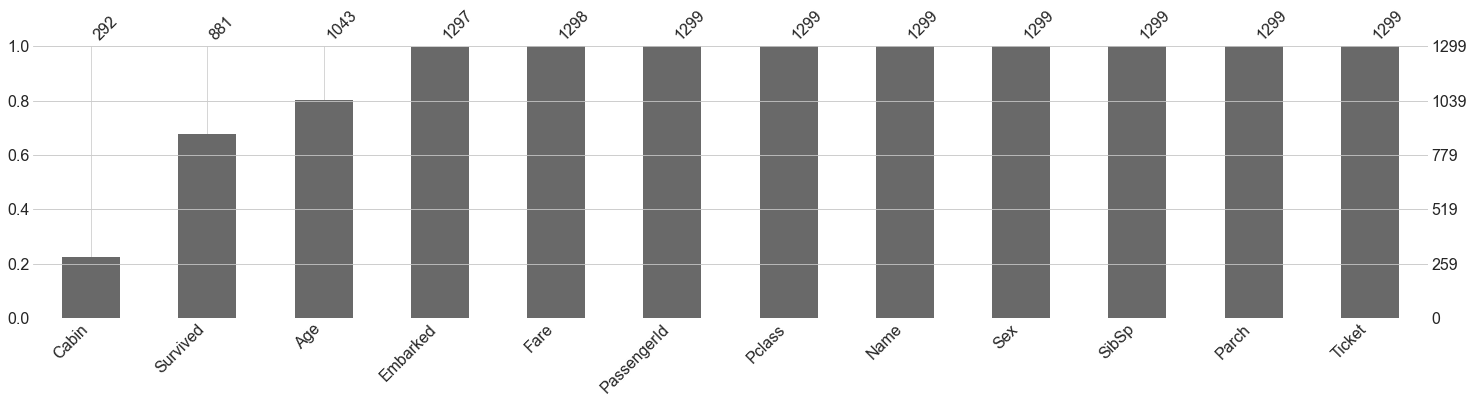

In [18]:
missingno.bar(df, sort='ascending', figsize=(25, 5));

In [19]:
# Check missing values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [20]:
# Missing Percentage
(df.isnull().sum()/df.isnull().replace([False],[True]).sum()) * 100

PassengerId     0.000000
Survived       32.178599
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.707467
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076982
Cabin          77.521170
Embarked        0.153965
dtype: float64

Age and Cabin features have an important part of missing values.

Survived missing values correspond to the join testing dataset (Survived column doesn't exist in test set)

In [21]:
# Plot the distribution of each feature
def plot_distribution(df, cols=5, width=20, height=15, hspace=0.4, wspace=0.5):
    fig = plt.figure(figsize=(width,height), dpi=100)
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df.shape[1]) / cols)
    for i, col in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(col)
        if df.dtypes[col] == np.object:
            # Use countplot for categorical feature
            g = sns.countplot(y=col, data=df)
            # Shorten the feature name
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            # Use distribution for numerical feature
            g = sns.distplot(df[col])
            plt.xticks(rotation=25)

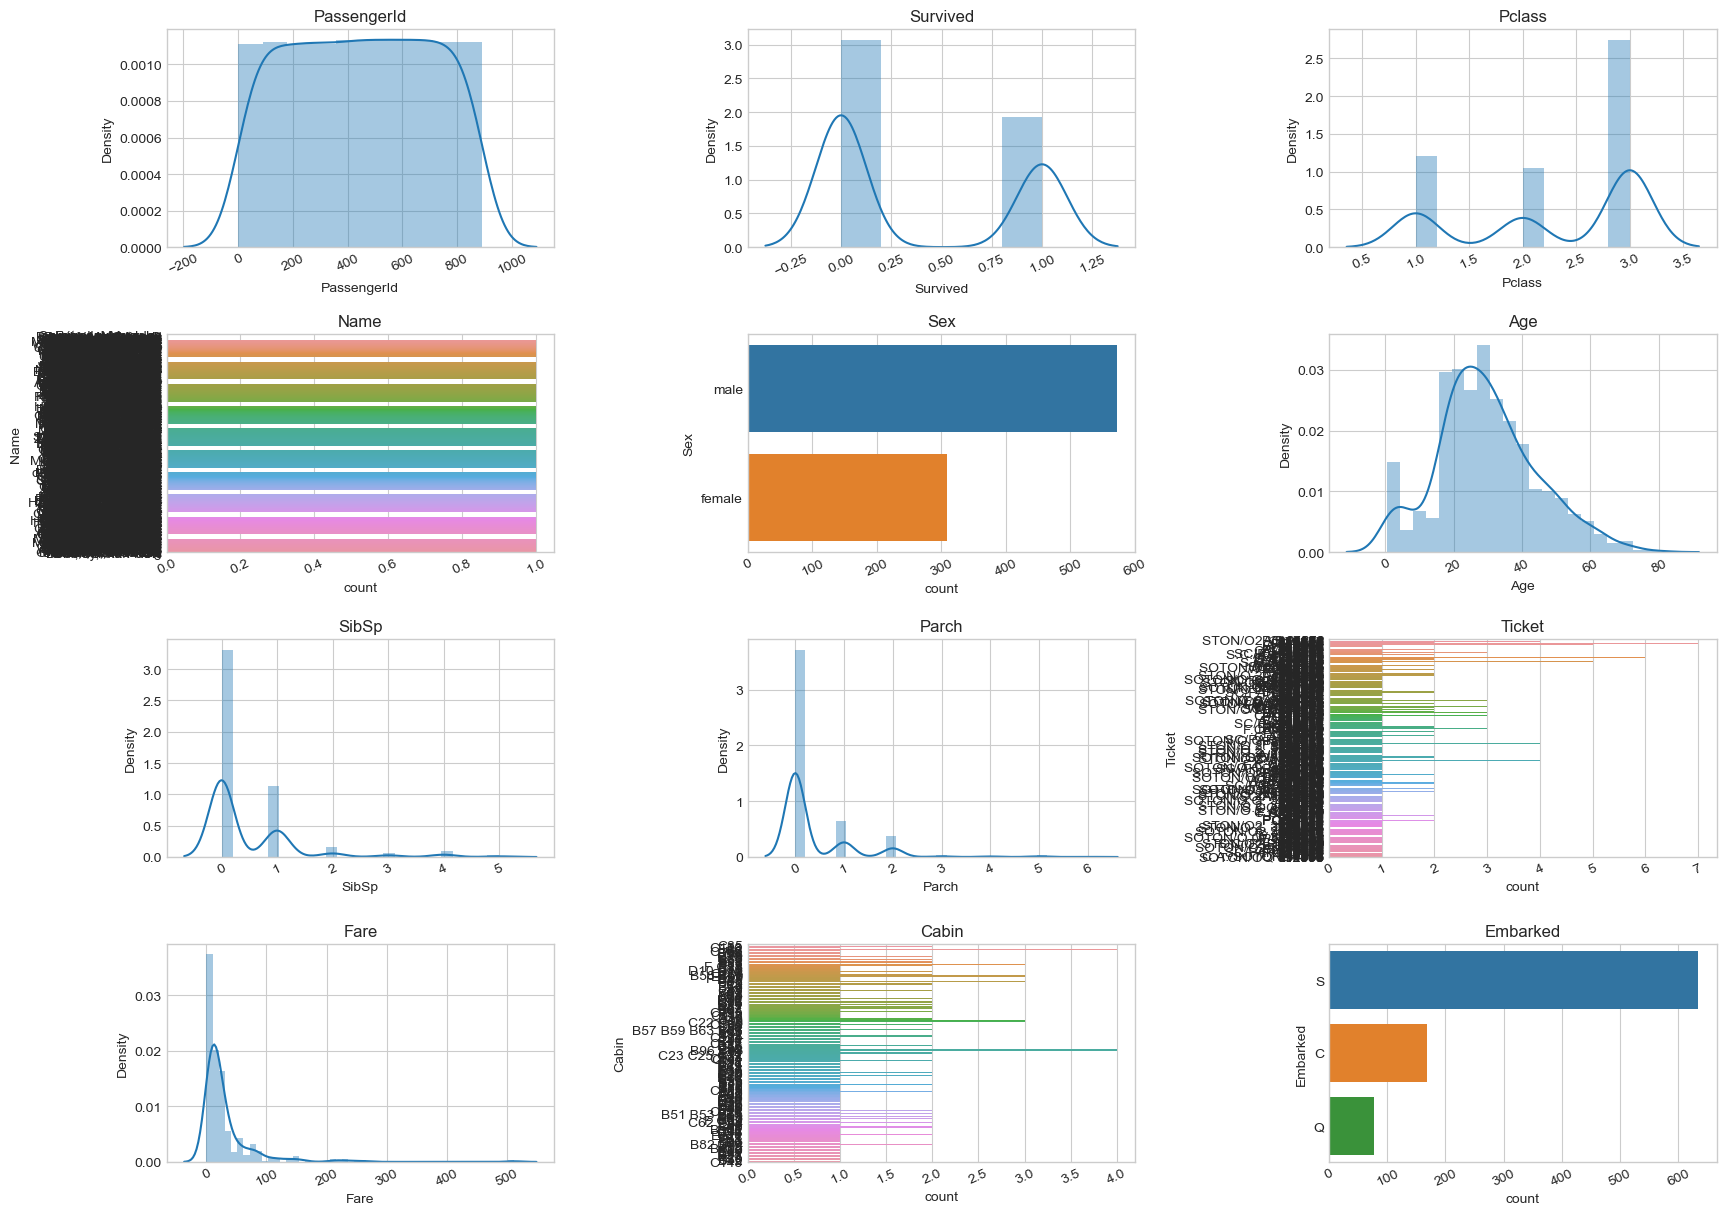

In [22]:
plot_distribution(train, cols=3)

## Univariate Analysis

In [23]:
# Create dataframe for perfom data analysis.
df_bin = pd.DataFrame() # Discretised continuous variables
df_con = pd.DataFrame() # continuous variables

### Feature Survived

This is the feature we are trying to predict.

+ 0 = No
+ 1 = Yes

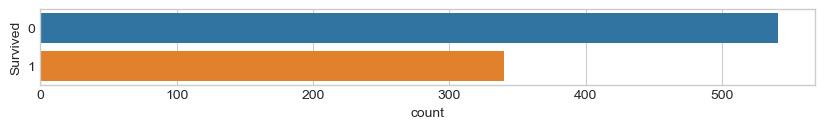

In [24]:
plt.figure(figsize=(10, 1), dpi=100)
sns.countplot(y='Survived',data=train);

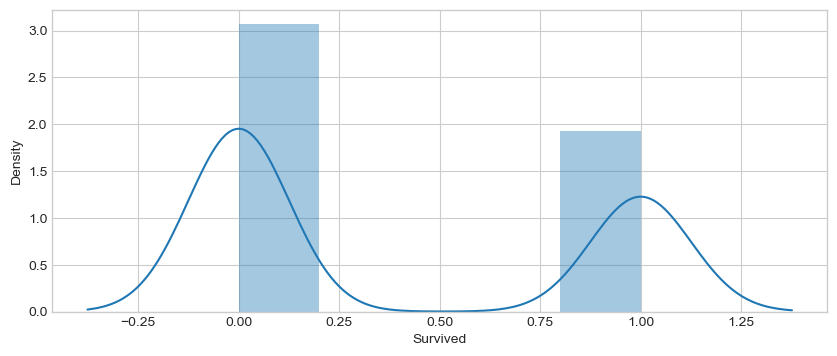

In [25]:
plt.figure(figsize=(10, 4), dpi=100)
sns.distplot(train['Survived']);

In [26]:
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

### Feature PassengerId

Unique Id for each passenger

In [27]:
train[['PassengerId']].corrwith(train['Survived'])

PassengerId   -0.003089
dtype: float64

**Note:** PassengerId is just a unique id number for each passenger since it's no relate to our target (Survived feature), we won't move forward using this variable.

### Feature Pclass

A proxy for socio-economic status (SES)

+ 1st = Upper
+ 2nd = Middle
+ 3rd = Lower

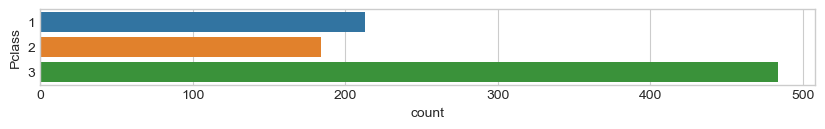

In [28]:
plt.figure(figsize=(10, 1), dpi=100)
sns.countplot(y='Pclass',data=train);

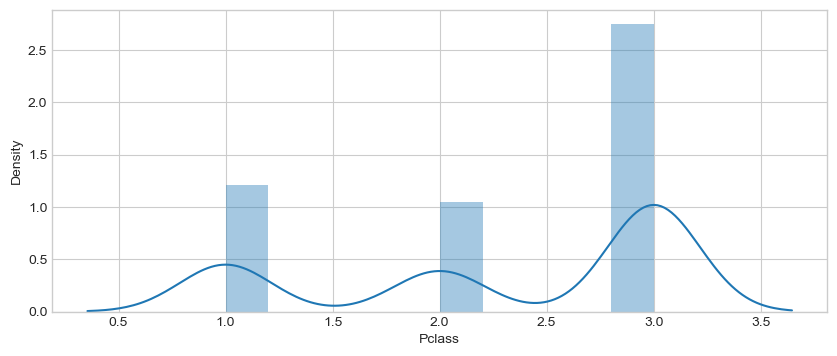

In [29]:
plt.figure(figsize=(10, 4), dpi=100)
sns.distplot(train['Pclass']);

In [30]:
train['Pclass'].describe()

count    881.000000
mean       2.307605
std        0.835055
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [31]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

### Feature Name

The name of the passenger

In [32]:
train['Name'].value_counts()

Newell, Mr. Arthur Webster                     1
Markoff, Mr. Marin                             1
Renouf, Mrs. Peter Henry (Lillian Jefferys)    1
Hoyt, Mr. Frederick Maxfield                   1
Weir, Col. John                                1
                                              ..
Stahelin-Maeglin, Dr. Max                      1
Hamalainen, Mrs. William (Anna)                1
Oreskovic, Mr. Luka                            1
Taylor, Mr. Elmer Zebley                       1
Davidson, Mr. Thornton                         1
Name: Name, Length: 881, dtype: int64

In [33]:
train['Name'].describe()

count                            881
unique                           881
top       Newell, Mr. Arthur Webster
freq                               1
Name: Name, dtype: object

Each name is unique for each passenger just like the PassengerId. 

However, the title might be useful information, we will deal with it later.

### Feature Sex

The gender of the passenger

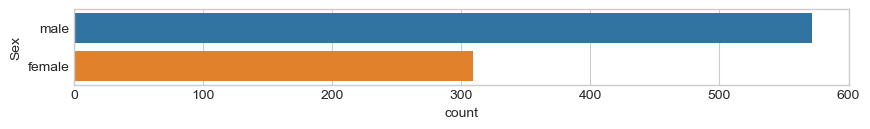

In [34]:
plt.figure(figsize=(10, 1), dpi=100)
sns.countplot(y='Sex', data=train);

In [35]:
train['Sex'].describe()

count      881
unique       2
top       male
freq       572
Name: Sex, dtype: object

In [36]:
df_bin['Sex'] = train['Sex']
df_con['Sex'] = train['Sex']

### Feature SibSp

the number of siblings / spouses aboard the Titanic

sibsp: The dataset defines family relations in this way...

+ Sibling = brother, sister, stepbrother, stepsister
+ Spouse = husband, wife (mistresses and fiancés were ignored)

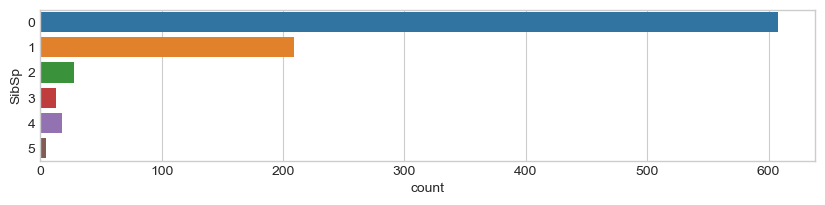

In [37]:
plt.figure(figsize=(10, 2), dpi=100)
sns.countplot(y='SibSp',data=train);

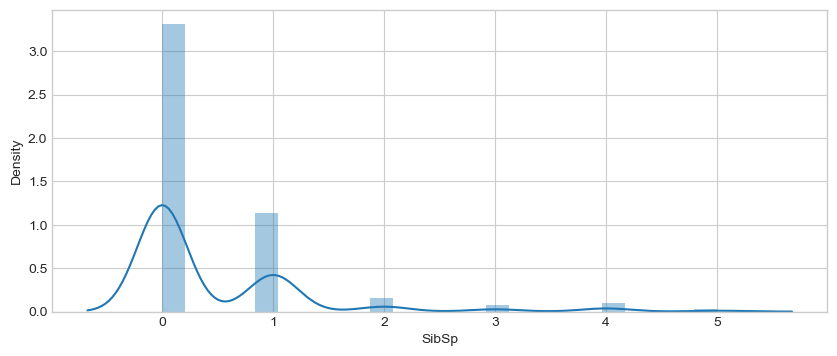

In [38]:
plt.figure(figsize=(10, 4), dpi=100)
sns.distplot(train['SibSp']);

In [39]:
train[['SibSp']].describe()

,SibSp
count,881.000000
mean,0.455165
std,0.871571
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,5.000000


In [40]:
train[['SibSp']].corrwith(train['Survived'])

SibSp    0.00333
dtype: float64

In [41]:
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

### Feature Parch

the number of parents / children aboard the Titanic

parch: The dataset defines family relations in this way...

+ Parent = mother, father
+ Child = daughter, son, stepdaughter, stepson
+ Some children travelled only with a nanny, therefore parch=0 for them.

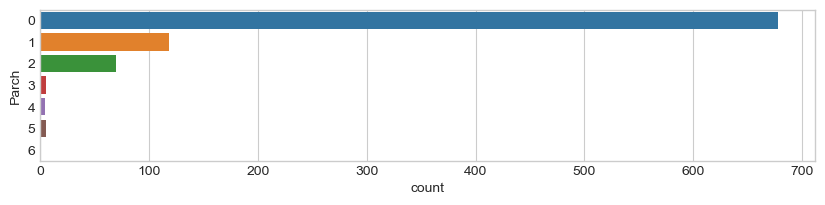

In [42]:
plt.figure(figsize=(10, 2), dpi=100)
sns.countplot(y='Parch',data=train);

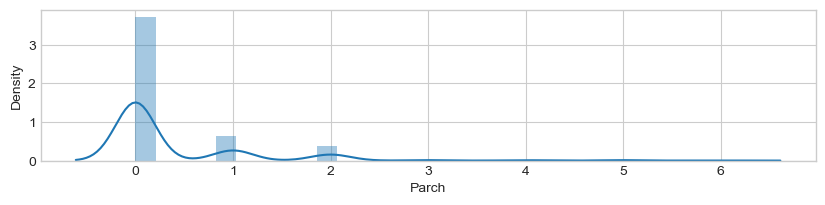

In [43]:
plt.figure(figsize=(10, 2), dpi=100)
sns.distplot(train['Parch']);

In [44]:
train['Parch'].describe()

count    881.000000
mean       0.363224
std        0.791839
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [45]:
train[['Parch']].corrwith(train['Survived'])

Parch    0.092819
dtype: float64

In [46]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

### Feature Ticket

Ticket number of each passenger

In [47]:
train['Ticket'].value_counts()

347082             7
1601               7
347088             6
CA 2144            6
3101295            6
                  ..
113796             1
250652             1
A/4 45380          1
SC/AH Basle 541    1
234604             1
Name: Ticket, Length: 680, dtype: int64

In [48]:
len(train['Ticket'].unique())

680

In [49]:
# Duplication Percentage
train['Ticket'].duplicated().sum()/len(train['Ticket']) * 100

22.8149829738933

**Note:** Since ticket has 22% of duplication and there may not be a correlation between Ticket and survival, we won't move forward using this variable.

### Feature Fare

Passenger fare

In [50]:
# Check missing values
df['Fare'].isnull().sum()

1

In [51]:
# Check missing values
(df['Fare'].isnull().sum()/len(df['Fare'])) * 100

0.07698229407236336

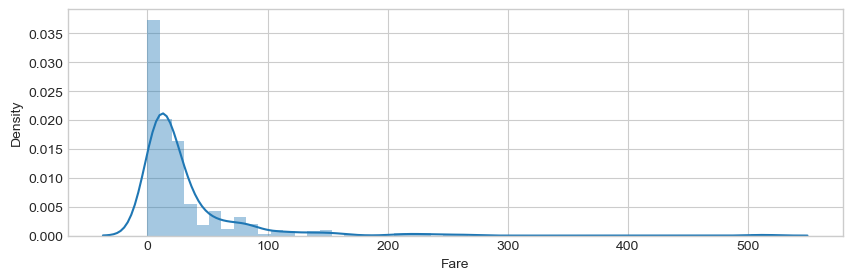

In [52]:
plt.figure(figsize=(10, 3), dpi=100)
sns.distplot(train['Fare']);

In [53]:
train['Fare'].describe()

count    881.000000
mean      31.121566
std       47.996249
min        0.000000
25%        7.895800
50%       14.454200
75%       30.500000
max      512.329200
Name: Fare, dtype: float64

In [54]:
train[['Fare']].corrwith(train['Survived'])

Fare    0.264613
dtype: float64

In [55]:
# Discretize the values
df_bin['Fare'] = pd.cut(train['Fare'], 4)

In [56]:
df_bin['Fare'].value_counts()

(-0.512, 128.082]     846
(128.082, 256.165]     29
(384.247, 512.329]      3
(256.165, 384.247]      3
Name: Fare, dtype: int64

In [57]:
df_con['Fare'] = train['Fare']

### Feature Cabin

The carbin number

In [58]:
# Check missing values
df['Cabin'].isnull().sum()

1007

In [59]:
# Missing Percentage
(df['Cabin'].isnull().sum()/len(df)) * 100

77.5211701308699

In [60]:
df['Cabin'].value_counts()

G6                 5
B57 B59 B63 B66    5
F33                4
F4                 4
F2                 4
                  ..
C111               1
E36                1
D7                 1
D22                1
E40                1
Name: Cabin, Length: 186, dtype: int64

**Note:** Since there are too many missing values, we won't move forward using this variable.

### Feature Age

Age of each passenger in years

In [61]:
# Check missing values
df['Age'].isnull().sum()

256

In [62]:
# Missing Percentage
(df['Age'].isnull().sum()/len(df)) * 100

19.70746728252502

**Note:** We will deal with missing values after the univariate analysis

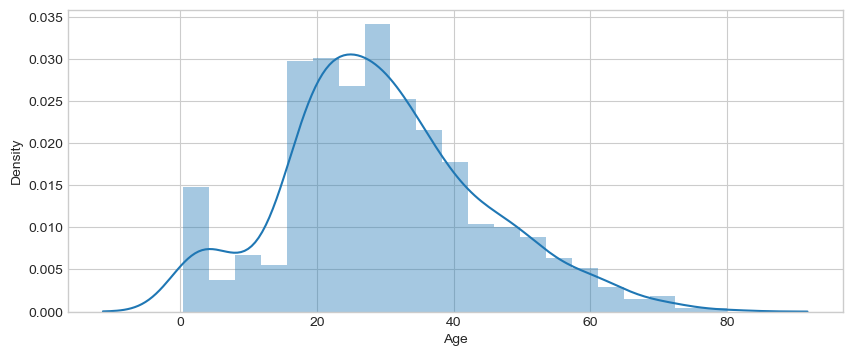

In [63]:
plt.figure(figsize=(10, 4), dpi=100)
sns.distplot(train['Age']);

In [64]:
train['Age'].describe()

count    711.000000
mean      29.731603
std       14.547835
min        0.420000
25%       20.250000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**Note:** We will add this variable to the sub dataframe after deal with missing values

### Feature Embarked

Port of Embarkation of each passenger

+ C = Cherbourg
+ Q = Queenstown
+ S = Southampton

In [65]:
# Check missing values
df['Embarked'].isnull().sum()

2

In [66]:
# Missing Percentage
(df['Embarked'].isnull().sum()/len(df)) * 100

0.15396458814472672

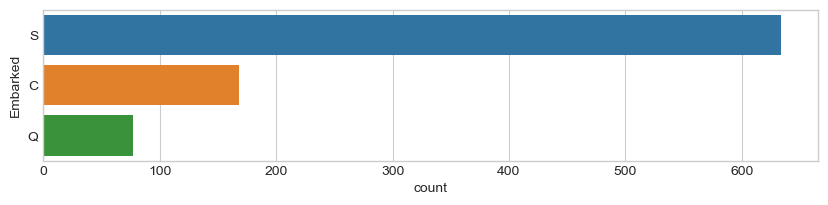

In [67]:
plt.figure(figsize=(10, 2), dpi=100)
sns.countplot(y='Embarked',data=train);

In [68]:
train[['Embarked']].describe()

,Embarked
count,879
unique,3
top,S
freq,634


**Note:** We will add this variable to the sub dataframe after deal with missing values

## Filling missing values

There are 3 features that have missing values.

+ Age
+ Fare
+ Embarked
+ Cabin ( Since 77% missing way too much so we will discard this feature )

### Age

Age contains 256 values in the whole dataset

We decided to keep the age feature and to impute the missing values.

In [69]:
# temporary convert Sex into categorical for visualization
df["Sex"] = df["Sex"].map({"male": 0, "female":1})

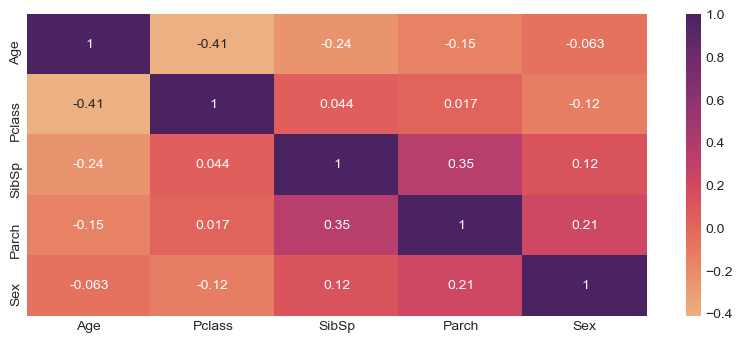

In [70]:
plt.figure(figsize=(10, 4), dpi=100)
sns.heatmap(df[["Age","Pclass","SibSp","Parch","Sex"]].corr(),cmap="flare",annot=True);

In [71]:
df.corrwith(df['Age'])

PassengerId    0.026685
Survived      -0.076867
Pclass        -0.411777
Sex           -0.063244
Age            1.000000
SibSp         -0.242127
Parch         -0.148784
Fare           0.189775
dtype: float64

In [72]:
# Convert back into the string object and we will encode it later
df["Sex"] = df["Sex"].map({0: 'male', 1: 'female'})

Since Pclass, SibSp and Parch are the most correlated features with Age, We decided to impute with theses variable

In [73]:
index_nan = df["Age"][df["Age"].isnull()].index

for i in index_nan:
    age_med = df["Age"].median()
    age_pred = df["Age"][((df['Pclass'] == df.loc[i, "Pclass"]) & 
                          (df['Parch'] == df.loc[i, "Parch"]) & 
                          (df['Pclass'] == df.loc[i, "Pclass"]))].median()
    if not np.isnan(age_pred) :
        df['Age'].loc[i] = age_pred
    else :
        df['Age'].loc[i] = age_med

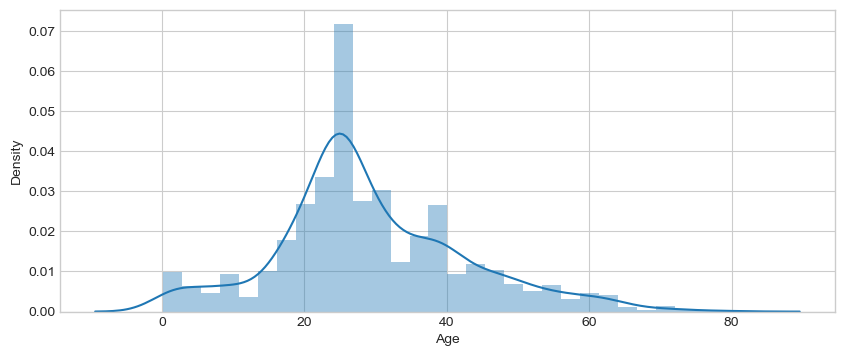

In [74]:
# Visualize after imputation
plt.figure(figsize=(10, 4), dpi=100)
sns.distplot(df['Age']);

### Fare

Fare contains 1 missing value 

In [75]:
df[df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


We will impute with the median of the fare in the same Pclass

In [76]:
fare_pclass3_med = df['Fare'][df['Pclass'] == 3].median()

In [77]:
fare_pclass3_med

8.05

In [78]:
df.loc[1033, 'Fare'] = fare_pclass3_med

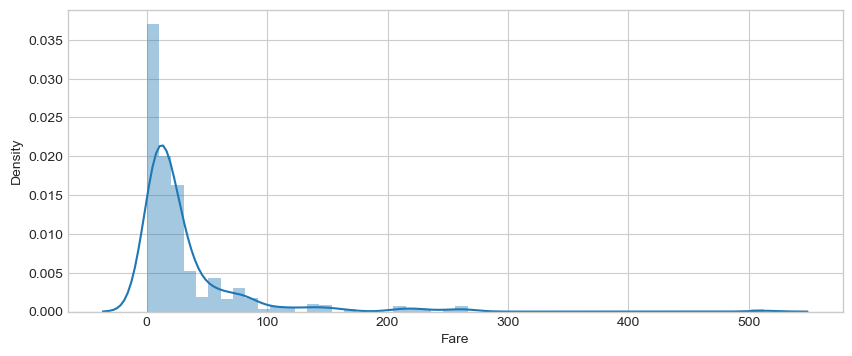

In [79]:
# Visualize after imputation
plt.figure(figsize=(10, 4), dpi=100)
sns.distplot(df['Fare']);

### Feature Embarked

Embarked contains 2 missing values

We will imputed with the most frequency value

In [80]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [81]:
# S is the most frequency
most_frequency = df['Embarked'].mode().values[0]
most_frequency

'S'

In [82]:
df['Embarked'].fillna(most_frequency, inplace=True)

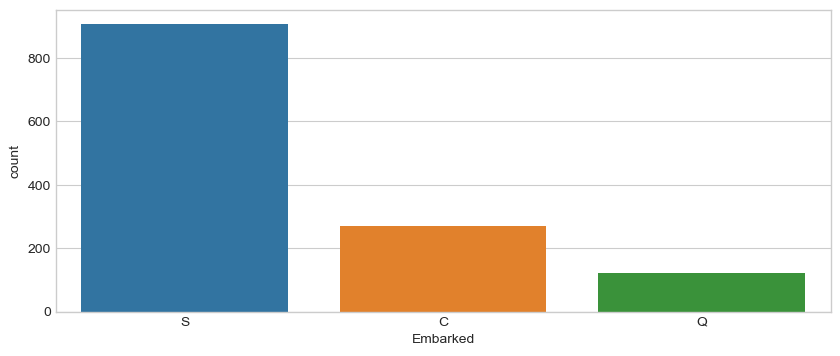

In [83]:
# Visualize after imputation
plt.figure(figsize=(10, 4), dpi=100)
sns.countplot(df['Embarked']);

Add the imputed features to the sub dataframe

In [84]:
train = df.iloc[:len(train)]

In [85]:
test = df.iloc[len(train):].drop(['Survived'], axis=1)

In [86]:
df_bin['Age'] = pd.cut(train['Age'], 10)
df_con['Age'] = train['Age']

df_bin['Fare'] = pd.cut(train['Fare'], 5)
df_con['Fare'] = train['Fare']

df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

Sub dataframe after imputed missing values and deleted outliers will looke like this

In [87]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,0,3,male,1,0,"(-0.512, 102.466]","(16.336, 24.294]",S
1,1,1,female,1,0,"(-0.512, 102.466]","(32.252, 40.21]",C
2,1,3,female,0,0,"(-0.512, 102.466]","(24.294, 32.252]",S
3,1,1,female,1,0,"(-0.512, 102.466]","(32.252, 40.21]",S
4,0,3,male,0,0,"(-0.512, 102.466]","(32.252, 40.21]",S


In [88]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,0,3,male,1,0,7.2500,22.0,S
1,1,1,female,1,0,71.2833,38.0,C
2,1,3,female,0,0,7.9250,26.0,S
3,1,1,female,1,0,53.1000,35.0,S
4,0,3,male,0,0,8.0500,35.0,S


## Bi-variate Analysis



In [89]:
# Plot a count of the categories from each categorical feature split by our prediction class: Survived.
def plot_bivariate_bar(df, hue, cols=3, width=20, height=15, hspace=0.2, wspace=0.5):
    fig = plt.figure(figsize=(width,height), dpi=100)
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df.shape[1]) / cols)
    for i, column in enumerate(df.columns):
        if column != hue :
            ax = fig.add_subplot(rows, cols, i + 1)
            ax.set_title(column)
            if df.dtypes[column] == np.object:
                g = sns.countplot(y=column, hue=hue, data=df)
                substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
                g.set(yticklabels=substrings)

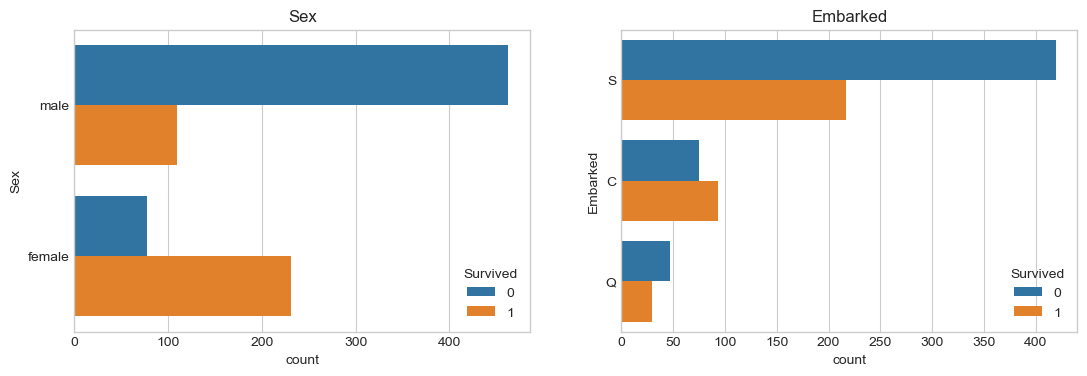

In [90]:
plot_bivariate_bar(df_con[['Sex', 'Embarked', 'Survived']], hue='Survived', height=4, wspace=0.2)

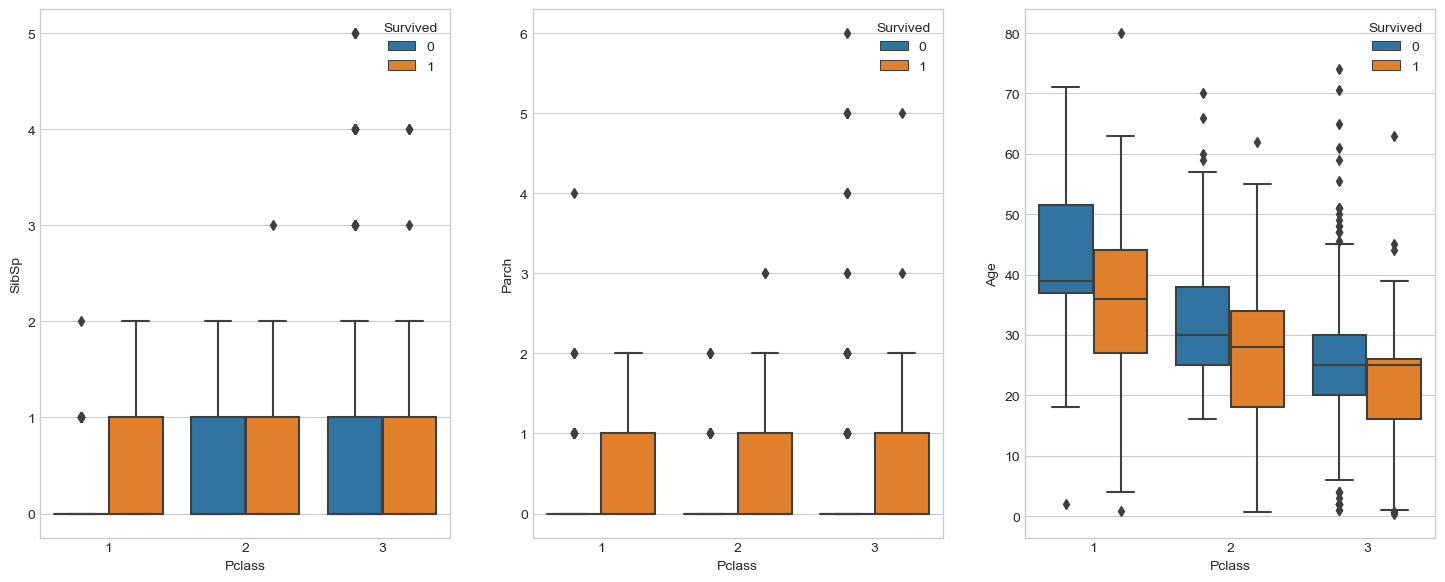

In [91]:
plt.figure(figsize=(18, 7), dpi=100) 
plt.subplot(1, 3, 1)
# Effect of Pclass and SibSp on Survived, across Pclass.
sns.boxplot(x='Pclass',y='SibSp',hue='Survived', data=df_con)

plt.subplot(1, 3, 2)
# Effect of Pclass and Parch on Survived, across Pclass.
sns.boxplot(x='Pclass',y='Parch',hue='Survived', data=df_con)

plt.subplot(1, 3, 3)
# Effect of Pclass and Age on Survived, across Pclass.
sns.boxplot(x='Pclass',y='Age',hue='Survived', data=df_con);

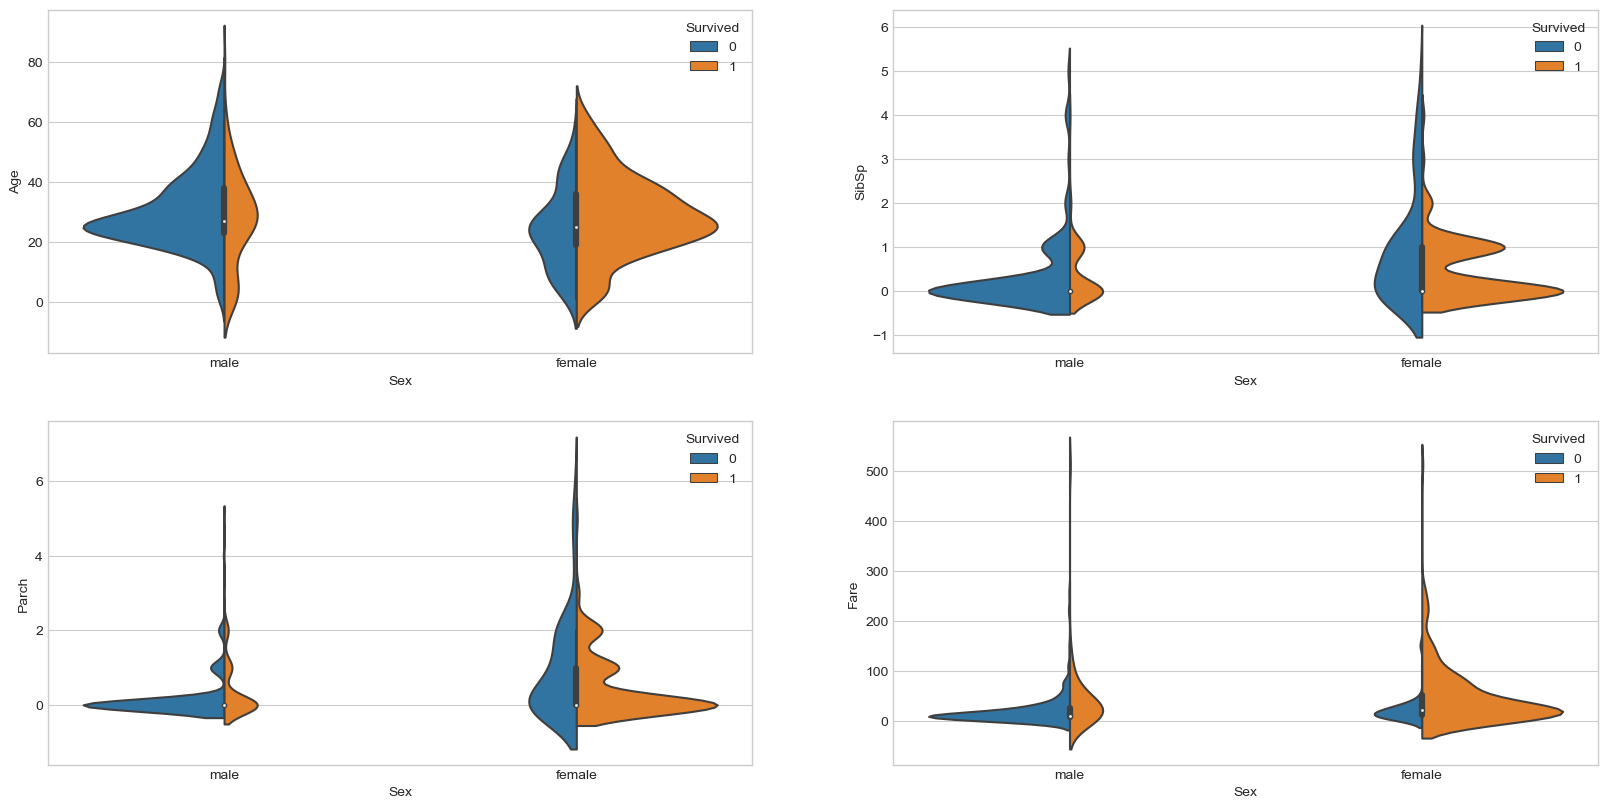

In [92]:
# Historical Trends on the Sex, Age, SibSp, Parch and Fare impact on Survived.
plt.figure(figsize=(20,10), dpi=100) 
plt.subplot(2, 2, 1)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_con, split=True, scale='count');

plt.subplot(2, 2, 2)
sns.violinplot(x='Sex', y='SibSp', hue='Survived', data=df_con, split=True, scale='count');

plt.subplot(2, 2, 3)
sns.violinplot(x='Sex', y='Parch', hue='Survived', data=df_con, split=True, scale='count');

plt.subplot(2, 2, 4)
sns.violinplot(x='Sex', y='Fare', hue='Survived', data=df_con, split=True, scale='count');

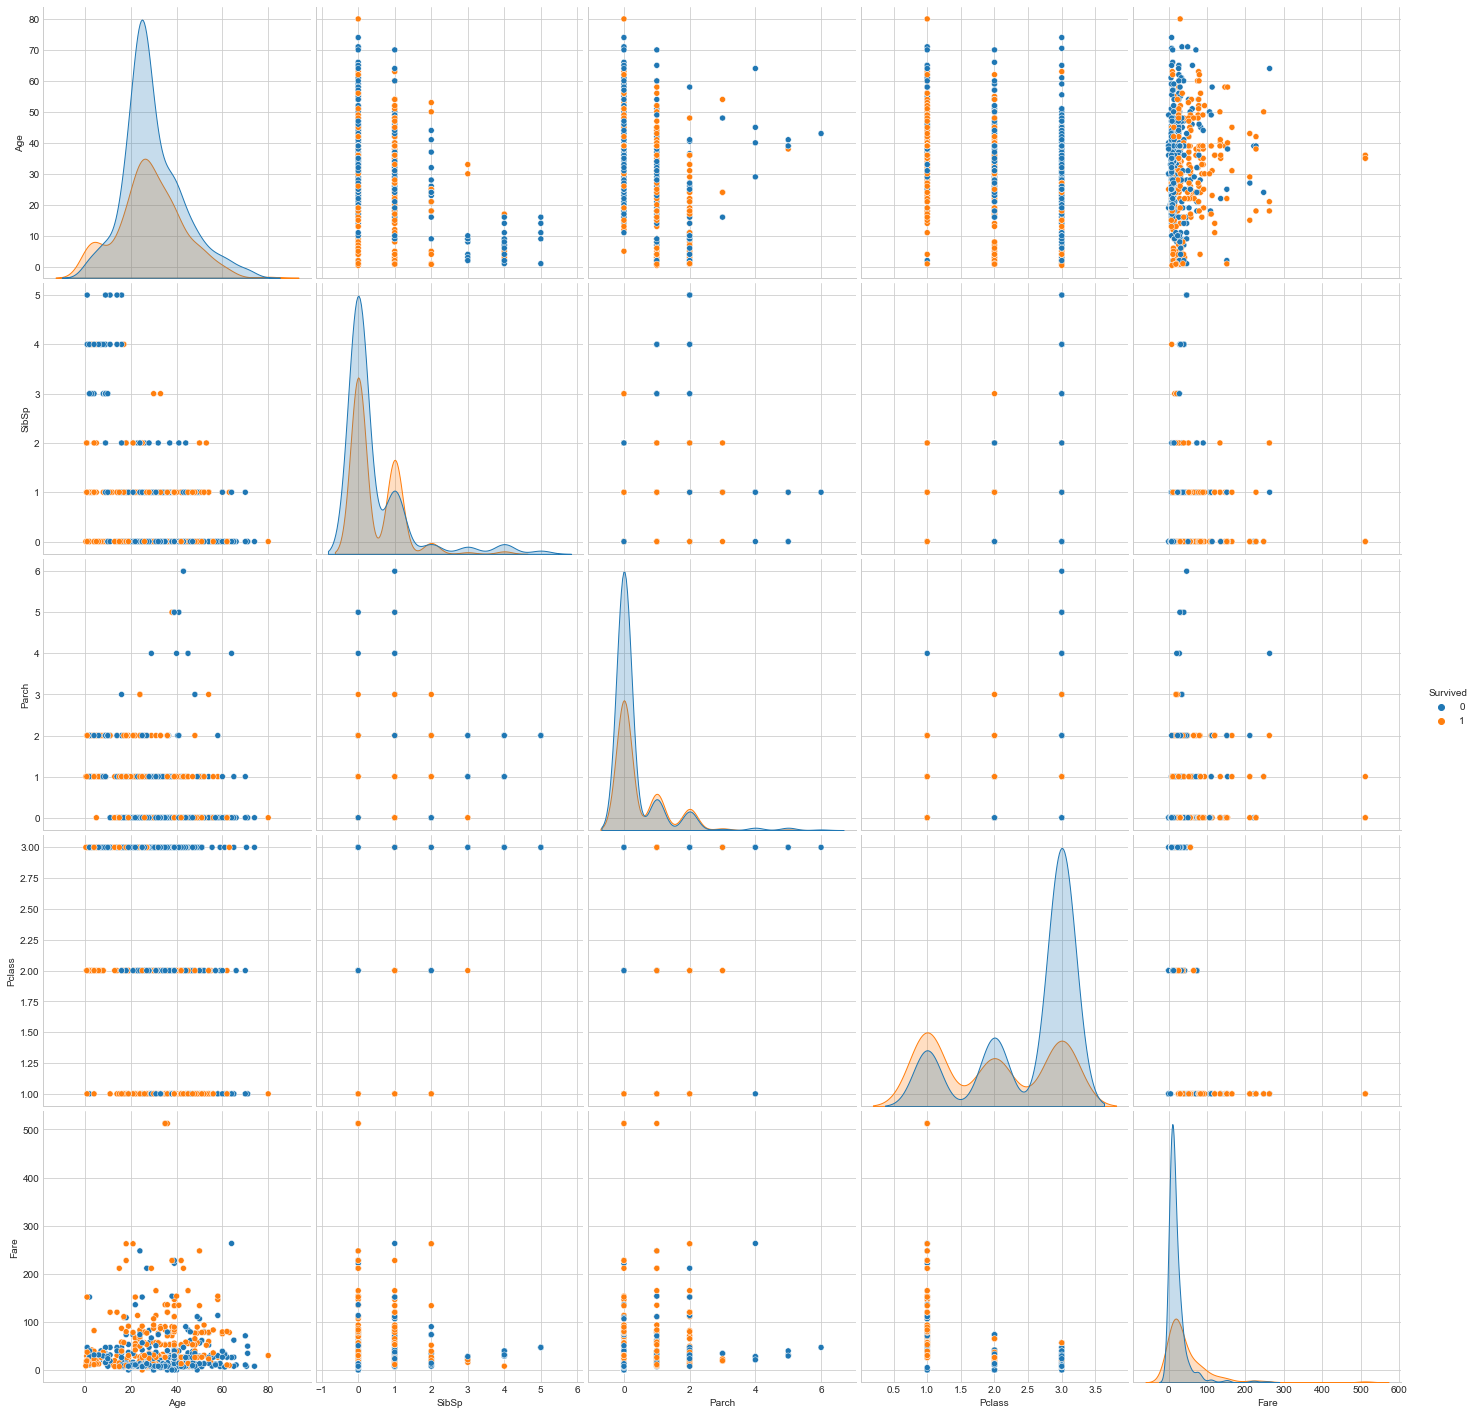

In [93]:
# Interaction between pairs of features.
sns.pairplot(df_con[['Survived', 'Age','SibSp','Parch','Pclass','Fare']], 
             hue="Survived", 
             diag_kind="kde",
             size=4);

## Feature Engineering

### Title

Feature Name is unique to each passenger. However the title in the name might be useful information

In [94]:
df['Name'].value_counts()

Connolly, Miss. Kate                    2
Kelly, Mr. James                        2
Delalic, Mr. Redjo                      1
Madigan, Miss. Margaret "Maggie"        1
Flegenheim, Mrs. Alfred (Antoinette)    1
                                       ..
Hamalainen, Mrs. William (Anna)         1
Stahelin-Maeglin, Dr. Max               1
Swane, Mr. George                       1
Collyer, Miss. Marjorie "Lottie"        1
Boulos, Master. Akar                    1
Name: Name, Length: 1297, dtype: int64

In [95]:
def get_title(s):
    return s.split(',')[1].split('.')[0].strip()

In [96]:
df['Title'] = df['Name'].apply(get_title)

In [97]:
df['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Don               1
Sir               1
Lady              1
Jonkheer          1
Dona              1
Mme               1
Capt              1
the Countess      1
Name: Title, dtype: int64

We deciced to group the title since some title are extremely rare

In [98]:
# Rare cases
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Mlle', 'Major', 'Dona', 'Lady', 'the Countess', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Mme'],
                                  'Rare')
# Women
df['Title'] = df['Title'].replace(['Miss', 'Mrs', 'Ms'], 'Women')

In [99]:
df['Title'].value_counts()

Mr        753
Women     454
Master     60
Rare       32
Name: Title, dtype: int64

In [100]:
train['Title'] = df.iloc[:len(train)]['Title']

In [101]:
test['Title'] = df.iloc[len(train):].drop(['Survived'], axis=1)['Title']

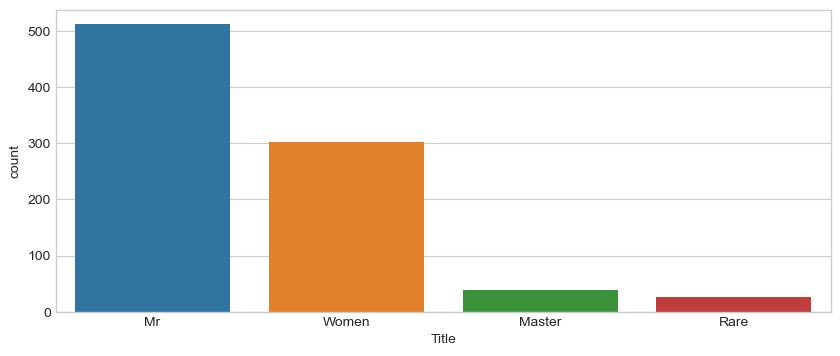

In [102]:
plt.figure(figsize=(10, 4), dpi=100)
sns.countplot(x='Title', data=train);

In [103]:
df_bin['Title'] = train['Title']
df_con['Title'] = train['Title']

### Familiy Size

Since feature SibSp and Parch are the number of member in the family, We could combine them to find the family size

In [104]:
# siblings + parents + the passenger
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

In [105]:
train['Family_size'] = df.iloc[:len(train)]['Family_size']

In [106]:
test['Family_size'] = df.iloc[len(train):].drop(['Survived'], axis=1)['Family_size']

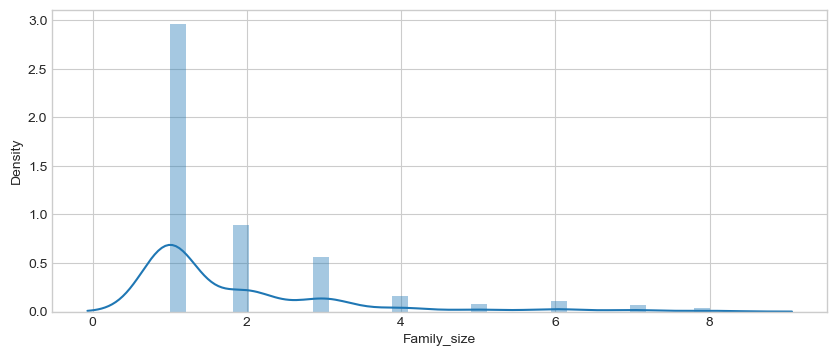

In [107]:
plt.figure(figsize=(10, 4), dpi=100)
sns.distplot(train['Family_size']);

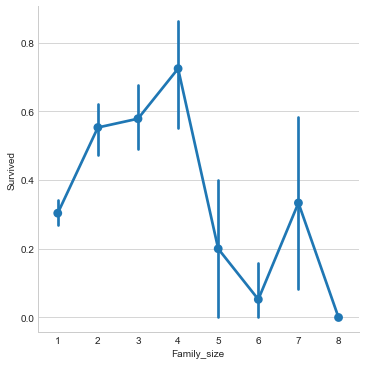

In [108]:
sns.factorplot(x='Family_size', y='Survived', data=train);

In [109]:
train[['Family_size']].corrwith(train['Survived'])

Family_size    0.055279
dtype: float64

In [110]:
df_bin['Family_size'] = pd.cut(train['Family_size'], [0, 1, 3, 5,8], labels=['alone', 'small', 'medium', 'large'])
df_con['Family_size'] = train['Family_size']

## Feature Encoding

One Hot Encoding

In [122]:
bin_cols = df_bin.columns.to_list()
bin_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=bin_cols)

In [123]:
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Rare,Title_Women,Family_size_alone,Family_size_small,Family_size_medium,Family_size_large
0,0,0,0,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,1,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
4,0,0,0,1,0,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [126]:
df_bin_enc.shape

(881, 45)

In [156]:
df_con_non_numeric_enc = pd.get_dummies(df_con[['Title', 'Embarked', 'Sex']])
df_con_pclass_enc = pd.get_dummies(df_con['Pclass'], prefix='Pclass')

df_con_enc = pd.concat([df_con,df_con_non_numeric_enc, df_con_pclass_enc], axis=1)
df_con_enc.drop(['Pclass', 'Sex', 'Embarked', 'Title'], axis=1, inplace=True)

In [157]:
df_con_enc.head()

,Survived,SibSp,Parch,Fare,Age,Family_size,Title_Master,Title_Mr,Title_Rare,Title_Women,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,7.2500,22.0,2,0,1,0,0,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,38.0,2,0,0,0,1,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,26.0,1,0,0,0,1,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,35.0,2,0,0,0,1,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,35.0,1,0,1,0,0,0,0,1,0,1,0,0,1


In [158]:
df_con_enc.shape

(881, 18)

## Feature Correlation

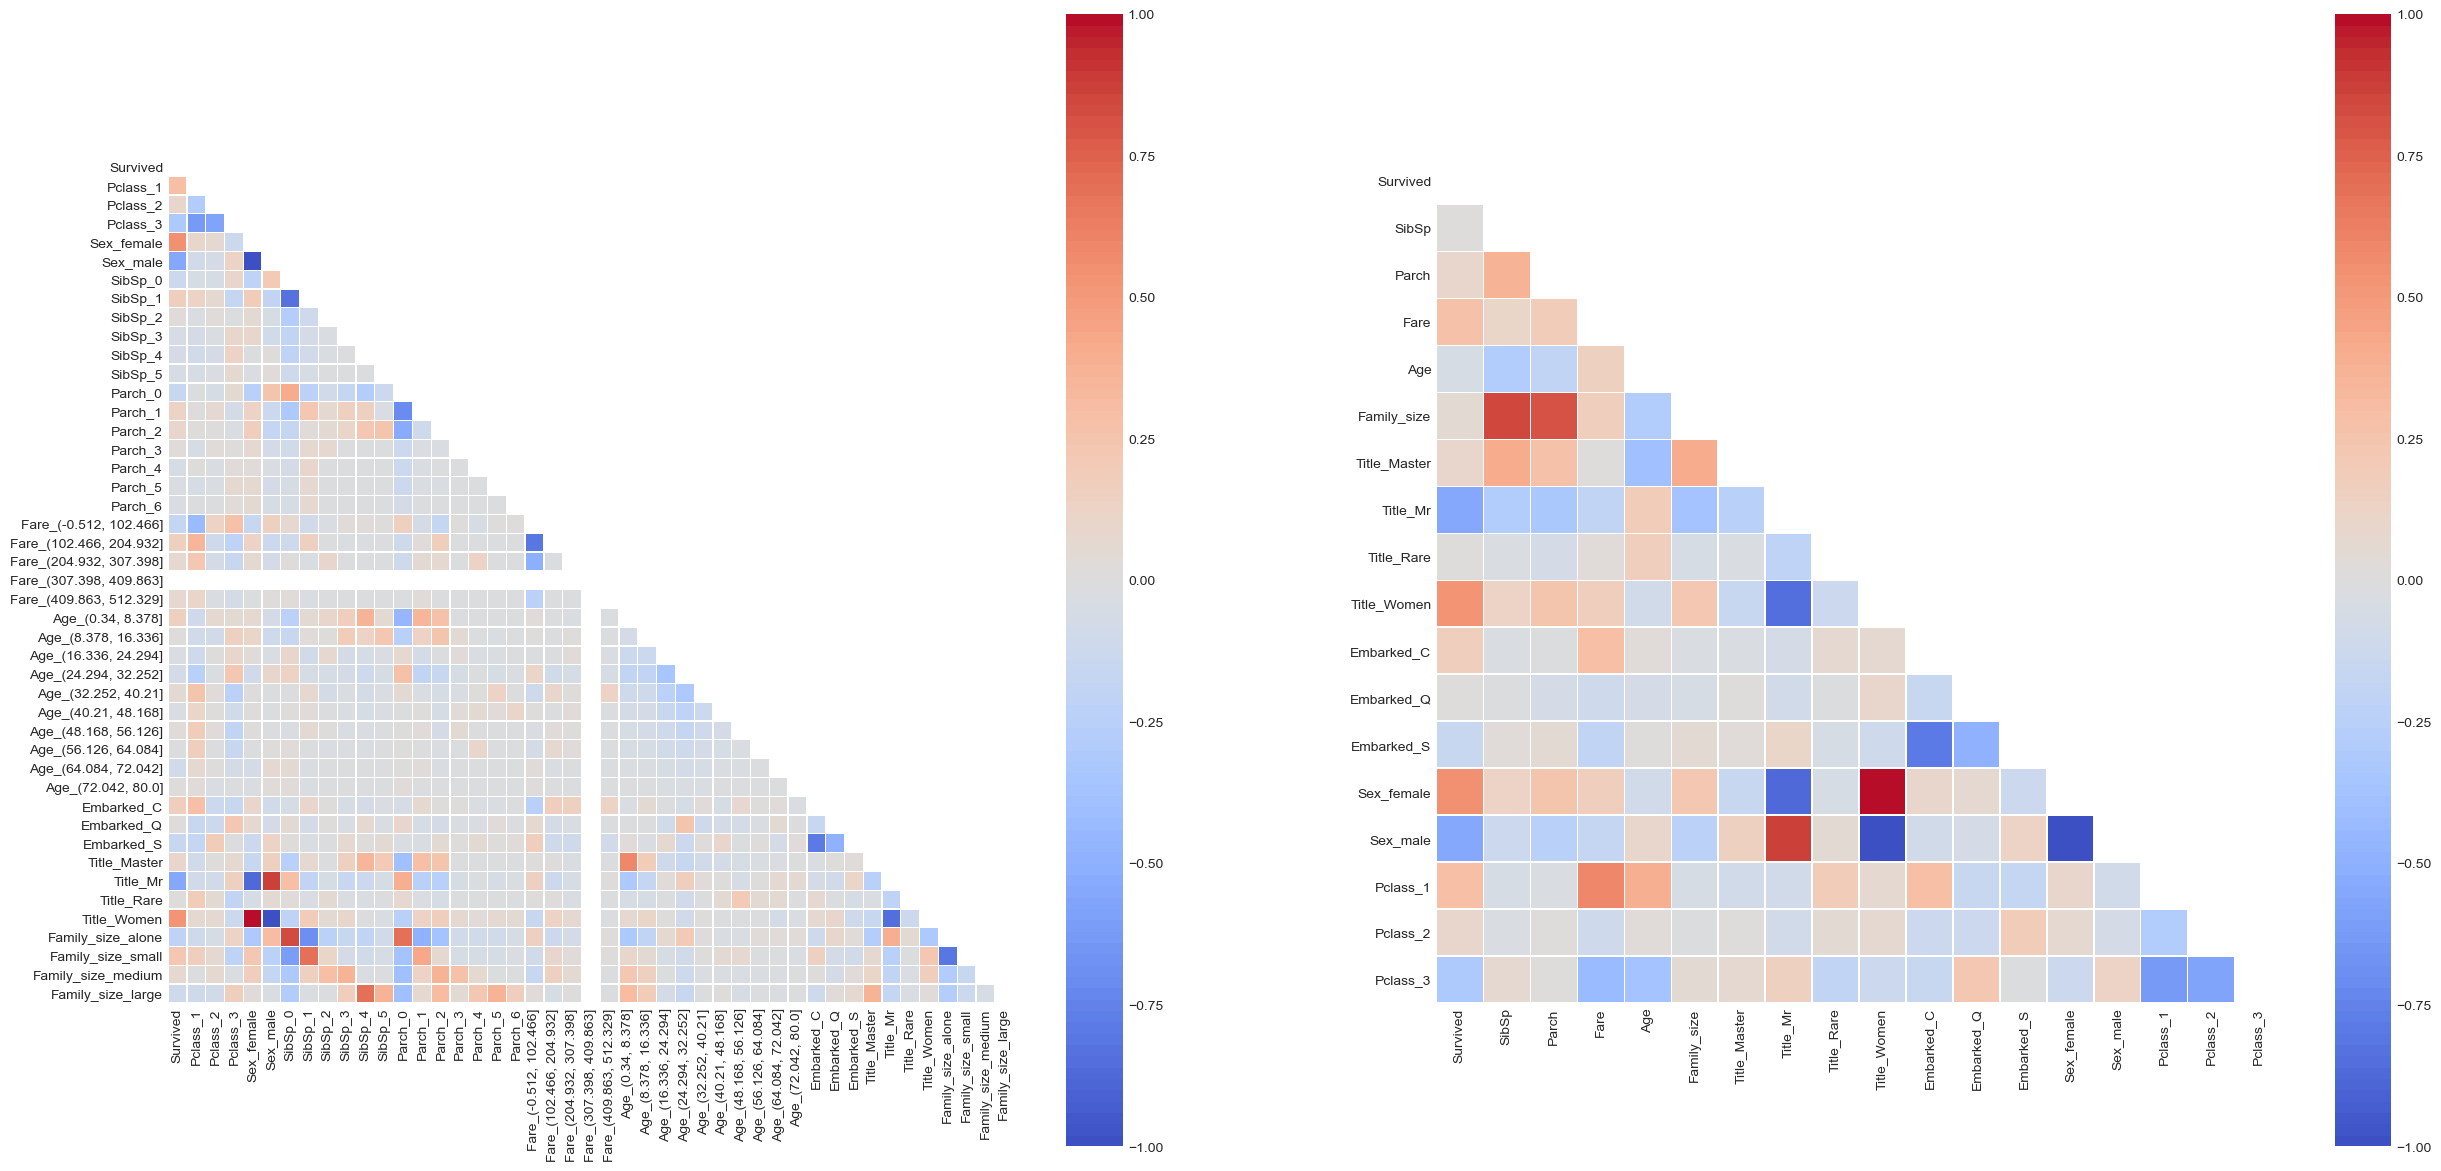

In [186]:
plt.figure(figsize=(30, 15), dpi=100) 

plt.subplot(1, 2, 1)
# Generate a mask for the upper triangle
mask = np.zeros_like(df_bin_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_bin_enc.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("coolwarm", 100), 
            mask=mask, 
            linewidths=0.2)

plt.subplot(1, 2, 2)
mask = np.zeros_like(df_con_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_con_enc.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("coolwarm", 100), 
            mask=mask,
            linewidths=0.2);

## Feature Importance

We will use Random Forest to get as insight on Feature Importance

In [351]:
rand_forest_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
rand_forest_clf.fit(df_con_enc.drop('Survived', axis=1), df_con_enc['Survived'])

RandomForestClassifier(n_jobs=-1, random_state=42)

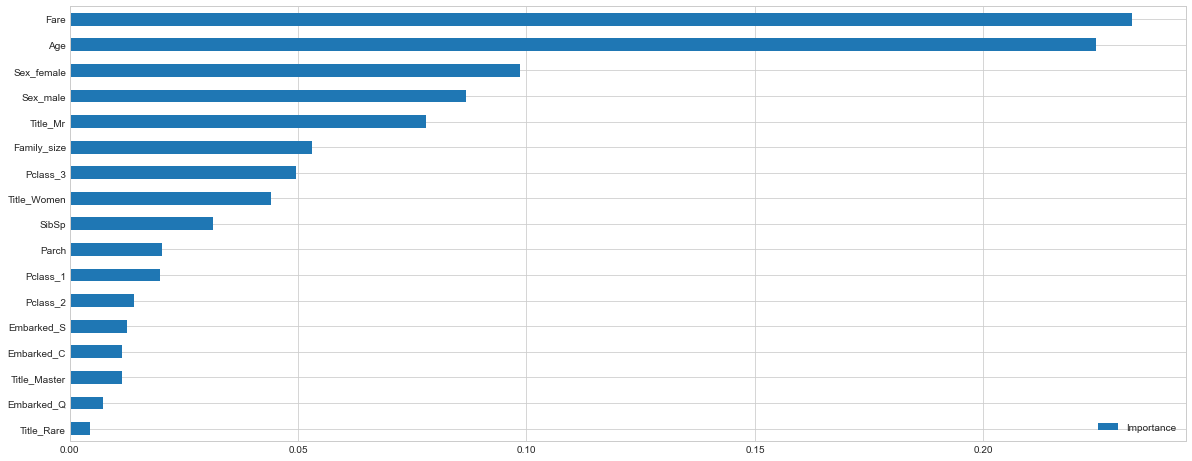

In [352]:
importances = rand_forest_clf.feature_importances_
df_importance = pd.DataFrame(importances, index=df_con_enc.drop('Survived', axis=1).columns, columns=["Importance"])
df_importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20, 8));

## Selecting Dataset

We will go through the machine learning process in each dataset

In [402]:
# OPTIONS: 
# - df_bin_enc
# - df_con_enc

# Change the dataset to see how would the algorithms perform under a differently dataset.

selected_df = df_bin_enc

In [403]:
selected_df.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Rare,Title_Women,Family_size_alone,Family_size_small,Family_size_medium,Family_size_large
0,0,0,0,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,1,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
4,0,0,0,1,0,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [404]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) 
y_train = selected_df.Survived 

In [405]:
X_train.shape

(881, 44)

In [406]:
X_train.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Rare,Title_Women,Family_size_alone,Family_size_small,Family_size_medium,Family_size_large
0,0,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [407]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Machine Learning Algorithm

We will be running the following algorithms.

+ Logistic Regression
+ Naive Bayes
+ Stochastic Gradient Decent
+ K-Nearest Neightbours
+ Decision Tree
+ Random Forest
+ Linear SVC
+ Gradient Boosted Trees

In [313]:
# Run the model and return the accuracy metrics
def fit_ml_model(ml_algo, X_train, y_train, cv):
    # Single run
    model = ml_algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    if (not isinstance(ml_algo, (SGDClassifier, LinearSVC))):
        probs = model.predict_proba(X_train)[:,1]
    else:
        probs = "Not Available"
    # CV 
    train_pred = model_selection.cross_val_predict(ml_algo, 
                                   X_train, 
                                   y_train, 
                                   cv=cv, 
                                   n_jobs=-1)
    acc_cv = round(accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, acc, acc_cv, probs

In [341]:
def plot_roc_curve(y_test, probs):
    fpr, tpr, threshold = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 4), dpi=100)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate');

### Logistic Regression

In [408]:
start_time = time.time()
train_pred_log, acc_log, acc_cv_log, prob_log = fit_ml_model(LogisticRegression(random_state=42, n_jobs=-1), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 83.43
Accuracy CV 10-Fold: 82.29
Running Time: 0:00:02.414465


In [409]:
print(classification_report(y_train, train_pred_log, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.85      0.87      0.86       541
    Survived       0.78      0.75      0.77       340

    accuracy                           0.82       881
   macro avg       0.81      0.81      0.81       881
weighted avg       0.82      0.82      0.82       881



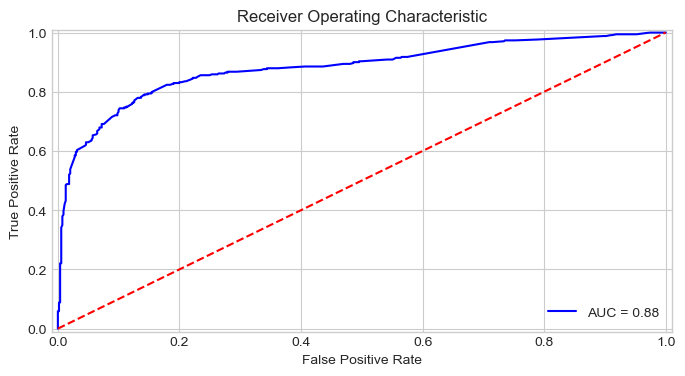

In [410]:
plot_roc_curve(y_train, prob_log)

### Naive Bayes

In [411]:
start_time = time.time()
train_pred_gnb, acc_gnb, acc_cv_gnb, prob_gnb = fit_ml_model(GaussianNB(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
gnb_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gnb)
print("Accuracy CV 10-Fold: %s" % acc_cv_gnb)
print("Running Time: %s" % datetime.timedelta(seconds=gnb_time))

Accuracy: 43.47
Accuracy CV 10-Fold: 42.91
Running Time: 0:00:00.497808


In [412]:
print(classification_report(y_train, train_pred_gnb, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.87      0.08      0.15       541
    Survived       0.40      0.98      0.57       340

    accuracy                           0.43       881
   macro avg       0.63      0.53      0.36       881
weighted avg       0.69      0.43      0.31       881



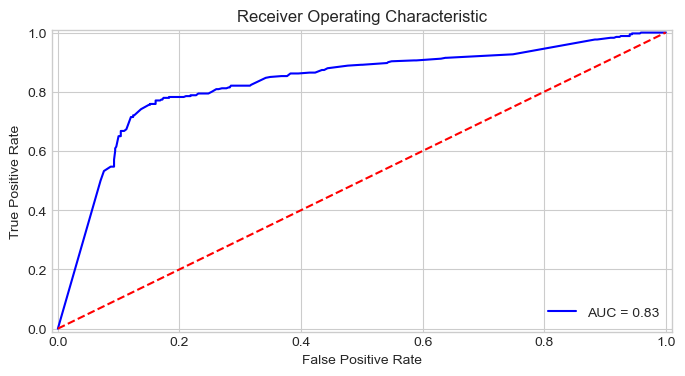

In [413]:
plot_roc_curve(y_train, prob_gnb)

### Stochastic Gradient Decent

In [414]:
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_model(SGDClassifier(n_jobs=-1, random_state=42), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 83.2
Accuracy CV 10-Fold: 79.91
Running Time: 0:00:00.725307


In [415]:
print(classification_report(y_train, train_pred_sgd, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.84      0.84      0.84       541
    Survived       0.74      0.74      0.74       340

    accuracy                           0.80       881
   macro avg       0.79      0.79      0.79       881
weighted avg       0.80      0.80      0.80       881



### K-Nearest Neightbours

In [416]:
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn, prob_knn = fit_ml_model(KNeighborsClassifier(n_jobs=-1), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 84.45
Accuracy CV 10-Fold: 81.04
Running Time: 0:00:00.206361


In [417]:
print(classification_report(y_train, train_pred_knn, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.82      0.88      0.85       541
    Survived       0.79      0.70      0.74       340

    accuracy                           0.81       881
   macro avg       0.80      0.79      0.80       881
weighted avg       0.81      0.81      0.81       881



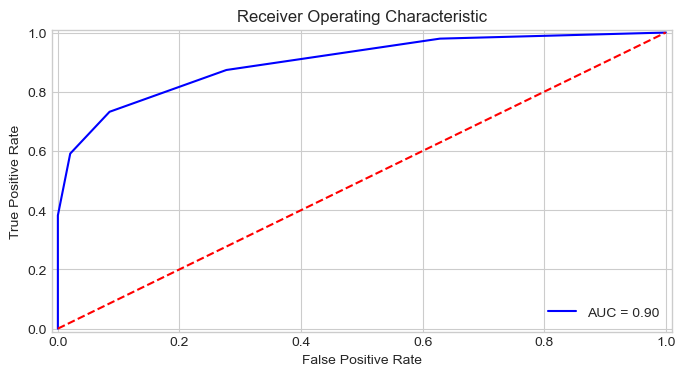

In [418]:
plot_roc_curve(y_train, prob_knn)

### Decision Tree

In [419]:
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt, prob_dt = fit_ml_model(DecisionTreeClassifier(random_state=42), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 88.31
Accuracy CV 10-Fold: 79.91
Running Time: 0:00:00.095080


In [420]:
print(classification_report(y_train, train_pred_dt, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.80      0.90      0.85       541
    Survived       0.80      0.64      0.71       340

    accuracy                           0.80       881
   macro avg       0.80      0.77      0.78       881
weighted avg       0.80      0.80      0.79       881



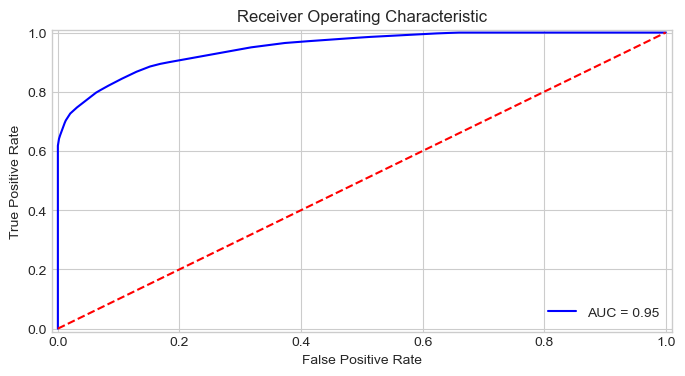

In [421]:
plot_roc_curve(y_train, prob_dt)

### Random Forest

In [422]:
start_time = time.time()
train_pred_rf, acc_rf, acc_cv_rf, prob_rf = fit_ml_model(RandomForestClassifier(random_state=42, n_jobs=-1), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 88.31
Accuracy CV 10-Fold: 79.8
Running Time: 0:00:00.594673


In [423]:
print(classification_report(y_train, train_pred_rf, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.81      0.88      0.84       541
    Survived       0.78      0.66      0.72       340

    accuracy                           0.80       881
   macro avg       0.79      0.77      0.78       881
weighted avg       0.80      0.80      0.79       881



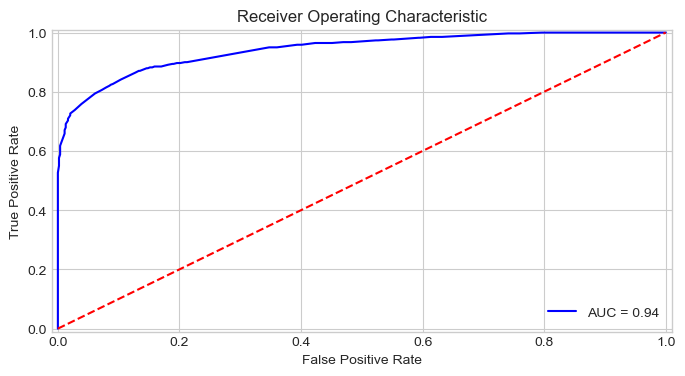

In [424]:
plot_roc_curve(y_train, prob_rf)

### Linear SVC

In [425]:
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc, _ = fit_ml_model(LinearSVC(random_state=42), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)
print("Running Time: %s" % datetime.timedelta(seconds=svc_time))

Accuracy: 83.2
Accuracy CV 10-Fold: 82.52
Running Time: 0:00:00.096295


In [426]:
print(classification_report(y_train, train_pred_svc, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.84      0.88      0.86       541
    Survived       0.80      0.73      0.76       340

    accuracy                           0.83       881
   macro avg       0.82      0.81      0.81       881
weighted avg       0.82      0.83      0.82       881



### Gradient Boosted Trees

In [427]:
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt, prob_gbt = fit_ml_model(GradientBoostingClassifier(random_state=42), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.04
Accuracy CV 10-Fold: 82.41
Running Time: 0:00:00.798655


In [428]:
print(classification_report(y_train, train_pred_gbt, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.83      0.90      0.86       541
    Survived       0.82      0.70      0.76       340

    accuracy                           0.82       881
   macro avg       0.82      0.80      0.81       881
weighted avg       0.82      0.82      0.82       881



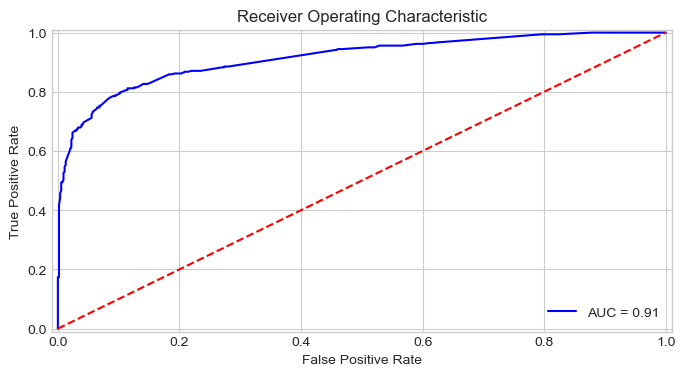

In [429]:
plot_roc_curve(y_train, prob_gbt)

## Ranking Results

Single run

In [430]:
models_single = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'K-Nearest Neightbours',
              'Decision Tree', 'Random Forest', 
              'Linear SVC', 'Gradient Boosting Trees'],
    'Score': [ 
        acc_log, 
        acc_gnb, 
        acc_sgd, 
        acc_knn,
        acc_dt,
        acc_rf, 
        acc_svc, 
        acc_gbt
    ]})

models_single.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,88.31
5,Random Forest,88.31
7,Gradient Boosting Trees,86.04
3,K-Nearest Neightbours,84.45
0,Logistic Regression,83.43
2,Stochastic Gradient Decent,83.20
6,Linear SVC,83.20
1,Naive Bayes,43.47


CV 10-folds

In [431]:
models_cv = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'K-Nearest Neightbours',
              'Decision Tree', 'Random Forest', 
              'Linear SVC', 'Gradient Boosting Trees'],
    'Score': [ 
        acc_cv_log, 
        acc_cv_gnb, 
        acc_cv_sgd, 
        acc_cv_knn,
        acc_cv_dt,
        acc_cv_rf, 
        acc_cv_svc, 
        acc_cv_gbt
    ]})

models_cv.sort_values(by='Score', ascending=False)

,Model,Score
6,Linear SVC,82.52
7,Gradient Boosting Trees,82.41
0,Logistic Regression,82.29
3,K-Nearest Neightbours,81.04
2,Stochastic Gradient Decent,79.91
4,Decision Tree,79.91
5,Random Forest,79.80
1,Naive Bayes,42.91


In [432]:
def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')

In [433]:
models = [
    'Logistic Regression',
    'Naive Bayes',
    'K-Nearest Neightbours',
    'Decision Tree',
    'Random Forest',  
    'Gradient Boosting Trees'
]
probs = [
    prob_log,
    prob_gnb,
    prob_knn,
    prob_dt,
    prob_rf,
    prob_gbt
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
]

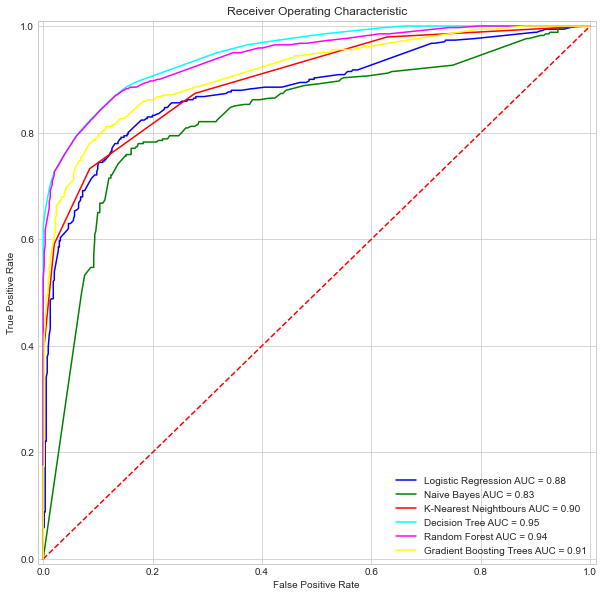

In [434]:
plt.figure(figsize=(10,10)) 

plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

for i, model in list(enumerate(models)):
    plot_roc_curves(y_train, probs[i], models[i])

**Note:** Store the score for df_con_enc and go through all these step with df_bin_enc

In [435]:
# df_con_enc_scores =  [ 
#                         {'log': {'single': acc_log, 'cv': acc_cv_log}}, 
#                         {'gnb': {'single': acc_gnb, 'cv': acc_cv_gnb}}, 
#                         {'sgd': {'single': acc_sgd, 'cv': acc_cv_sgd}}, 
#                         {'knn': {'single': acc_knn, 'cv': acc_cv_knn}}, 
#                         {'dt': {'single': acc_dt, 'cv': acc_cv_dt}}, 
#                         {'rf': {'single': acc_rf, 'cv': acc_cv_rf}},  
#                         {'svc': {'single': acc_svc, 'cv': acc_cv_svc}}, 
#                         {'gbt': {'single': acc_gbt, 'cv': acc_cv_gbt}}, 
#                     ]

df_bin_enc_scores = [ 
                        {'log': {'single': acc_log, 'cv': acc_cv_log}}, 
                        {'gnb': {'single': acc_gnb, 'cv': acc_cv_gnb}}, 
                        {'sgd': {'single': acc_sgd, 'cv': acc_cv_sgd}}, 
                        {'knn': {'single': acc_knn, 'cv': acc_cv_knn}}, 
                        {'dt': {'single': acc_dt, 'cv': acc_cv_dt}}, 
                        {'rf': {'single': acc_rf, 'cv': acc_cv_rf}},  
                        {'svc': {'single': acc_svc, 'cv': acc_cv_svc}}, 
                        {'gbt': {'single': acc_gbt, 'cv': acc_cv_gbt}}, 
                    ]
                    

In [436]:
df_con_enc_scores

[{'log': {'single': 83.31, 'cv': 82.52}},
 {'gnb': {'single': 80.7, 'cv': 79.0}},
 {'sgd': {'single': 76.73, 'cv': 69.92}},
 {'knn': {'single': 81.5, 'cv': 73.78}},
 {'dt': {'single': 84.45, 'cv': 81.04}},
 {'rf': {'single': 98.3, 'cv': 80.7}},
 {'svc': {'single': 67.54, 'cv': 78.09}},
 {'gbt': {'single': 90.01, 'cv': 82.97}}]

In [437]:
df_bin_enc_scores

[{'log': {'single': 83.43, 'cv': 82.29}},
 {'gnb': {'single': 43.47, 'cv': 42.91}},
 {'sgd': {'single': 83.2, 'cv': 79.91}},
 {'knn': {'single': 84.45, 'cv': 81.04}},
 {'dt': {'single': 88.31, 'cv': 79.91}},
 {'rf': {'single': 88.31, 'cv': 79.8}},
 {'svc': {'single': 83.2, 'cv': 82.52}},
 {'gbt': {'single': 86.04, 'cv': 82.41}}]

In [438]:
  from sklearn.model_selection import GridSearchCV

In [439]:
params = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

In [440]:
gbt_grid_cv = GridSearchCV(GradientBoostingClassifier(), param_grid=params, cv=10, n_jobs=-1, verbose=1)

In [441]:
gbt_grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 84672 candidates, totalling 846720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 4920 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 10520 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 17720 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 26520 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 36920 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 48920 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 62520 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 77720 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 94520 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 112920 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 132920 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 154520 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'min_samples_split': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'n_estimators': [10],
                         'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]},
             verbose=1)

In [442]:
gbt_grid_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.15, max_features='log2',
                           min_samples_leaf=0.1,
                           min_samples_split=0.13636363636363638,
                           n_estimators=10, subsample=0.8)

In [444]:
y_pred = gbt_grid_cv.best_estimator_.predict(X_train)

In [445]:
acc_score = accuracy_score(y_train, y_pred)

In [446]:
acc_score

0.7877412031782066

In [450]:
X_test = df_bin_enc[len(train):]

In [452]:
X_test

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Rare,Title_Women,Family_size_alone,Family_size_small,Family_size_medium,Family_size_large


In [ ]:
y_test_pred = gbt_grid_cv.best_estimator_()

In [447]:
test_Survived = pd.Series(y_pred, name="Survived")

results = pd.concat([test['PassengerId'], test_Survived],axis=1)

results.to_csv("titanic_gbt.csv",index=False)

In [448]:
pd.read_csv('./titanic_gbt.csv')

,PassengerId,Survived
0,NaN,0.0
1,NaN,1.0
2,NaN,1.0
3,NaN,1.0
4,NaN,0.0
...,...,...
1294,1305.0,NaN
1295,1306.0,NaN
1296,1307.0,NaN
1297,1308.0,NaN
